| Modelo de Classificação | Características Principais                                   |
|------------------------|------------------------------------------------------------|
| Regressão Logística    | Ideal para problemas binários, fácil de interpretar, rápido, assume relação linear. |
| Árvore de Decisão      | Fácil de visualizar, lida com dados categóricos e numéricos, propensa a overfitting, pode ser usada para regressão. |
| Random Forest         | Ensemble de árvores, alta precisão, robusto a overfitting, lida com dados faltantes. |
| SVM                   | Busca o melhor hiperplano, bom desempenho em alta dimensionalidade, linear ou não linear. |
| Naive Bayes           | Baseado no teorema de Bayes, rápido, eficiente, assume independência entre features. |
| Redes Neurais         | Alta capacidade de aprendizado, modela relações complexas, requer muitos dados, complexa de implementar. |
| XGBoost               | Algoritmo de boosting, alta precisão, eficiente, lida com dados faltantes, pode lidar com features interativas. |

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
#visão das metricas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#xboost com grid_search
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [4]:
base = pd.read_csv("apple_quality.csv")

# Estudo de base

In [ ]:
base.head()

In [ ]:
base.shape

In [ ]:
base['Quality'].unique()

In [ ]:
base['Quality'].value_counts()

In [ ]:
base[base.duplicated()]

In [ ]:
base.dtypes

In [ ]:
print(base['Quality'].min())
print(base['Quality'].max())

In [ ]:
# Ver dispersão das features
import pandas as pd
import matplotlib.pyplot as plt

a, b = "Sweetness", "Juiciness"

# Selecionando as features e o target
X_viz = base[[a, b]]
y_viz = base['Quality']

# Criando o gráfico de dispersão
plt.scatter(X_viz[a], X_viz[b], c=y_viz, cmap='viridis')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.title('Gráfico de Dispersão das Espécies de Iris')
plt.show()

In [ ]:
# Calculando a matriz de correlação
correlation_matrix = base.corr()

print(correlation_matrix)

                 Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
Size         1.000000 -0.170702  -0.324680     0.169868  -0.018892 -0.134773   
Weight      -0.170702  1.000000  -0.154246    -0.095882  -0.092263 -0.243824   
Sweetness   -0.324680 -0.154246   1.000000    -0.037552   0.095882 -0.273800   
Crunchiness  0.169868 -0.095882  -0.037552     1.000000  -0.259607 -0.201982   
Juiciness   -0.018892 -0.092263   0.095882    -0.259607   1.000000 -0.097144   
Ripeness    -0.134773 -0.243824  -0.273800    -0.201982  -0.097144  1.000000   
Acidity      0.196218  0.016414   0.085999     0.069943   0.248714 -0.202669   
Quality      0.244007  0.001421   0.250998    -0.012376   0.260223 -0.264315   

              Acidity   Quality  
Size         0.196218  0.244007  
Weight       0.016414  0.001421  
Sweetness    0.085999  0.250998  
Crunchiness  0.069943 -0.012376  
Juiciness    0.248714  0.260223  
Ripeness    -0.202669 -0.264315  
Acidity      1.000000 -0.007697  
Quality

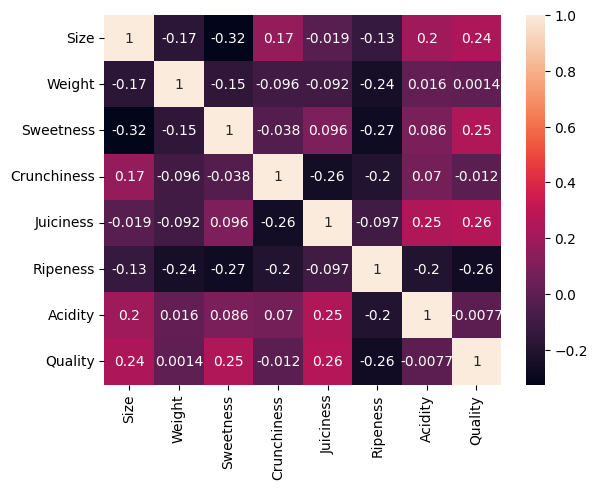

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando um mapa de calor
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Preparação da base

In [5]:
base = base.drop("A_id", axis=1)

In [6]:
#Tirando todos os NAN
base = base.dropna()

In [7]:
# Colocando 0 e 1 no target(Quality)
base['Quality'] = base['Quality'].apply(lambda x: 1 if x == 'good' else 0)

In [8]:
base["Acidity"] = base["Acidity"].astype("float")

In [ ]:
print(base["Quality"].value_counts())

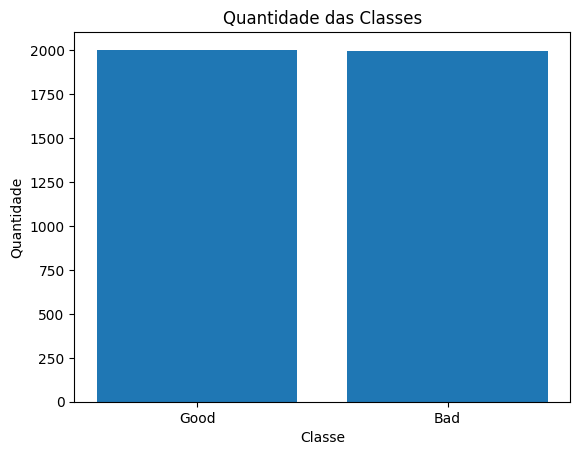

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que seus dados estão em um DataFrame do Pandas chamado 'df'
# com colunas 'classe' e 'contagem'

# Criar o gráfico de barras
plt.bar(["Good","Bad"], base["Quality"].value_counts())

# Adicionar título e rótulos
plt.title('Quantidade das Classes')
plt.xlabel('Classe')
plt.ylabel('Quantidade')

# Mostrar o gráfico
plt.show()

In [ ]:
base.head()

# Treinamento de modelos

## Criando bases de treino

In [10]:
X = base.drop("Quality", axis=1)
Y = base["Quality"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## Treinando com Xboost(normal)

In [ ]:
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=300)  # Para classificação
# model = xgb.XGBRegressor()  # Para regressão

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Matriz de confusão
confusion_mat = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", confusion_mat)

# Relatório de classificação
print(classification_report(y_test, y_pred))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizando a matriz de confusão
sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Melhores parametros do Xboost com Grid_search

In [ ]:
# Criando o modelo base XGBoost
model = xgb.XGBClassifier()

In [ ]:
# Definindo os hiperparâmetros a serem ajustados e seus valores
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
}

In [ ]:
# Criando o objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                          cv=5, scoring='accuracy')

In [ ]:
# Executando a busca
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
#melhor parametro: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300} - com id
#melhor parametro: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300} - sem id
# Imprimindo os melhores parâmetros
print(grid_search.best_params_)

In [ ]:
#acuracia: Accuracy: 0.9025 - sem id
# Avaliando o melhor modelo no conjunto de teste
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8975


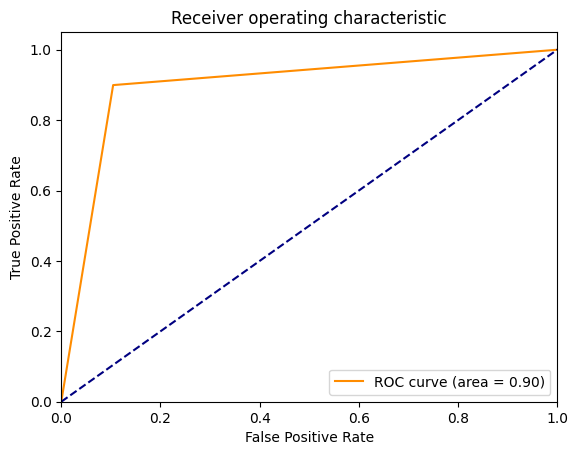

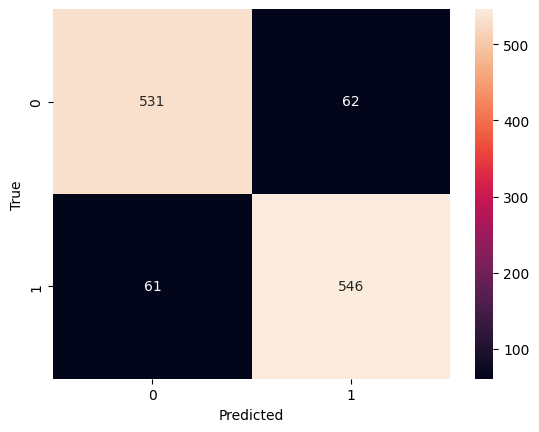

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       593
           1       0.90      0.90      0.90       607

    accuracy                           0.90      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.90      0.90      0.90      1200



In [ ]:
#MEtricas do modelo
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Criando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizando a matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Imprimindo o relatório de classificação
print(classification_report(y_test, y_pred))

## Melhores parametros do regression linear com Grid_search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Hiperparâmetros a serem testados
param_grid_linear = {'fit_intercept': [True, False],
                     'n_jobs': [-1],
                     'positive': [True,False]}

In [ ]:
# Criar os modelos
model_linear = LinearRegression()

In [ ]:
# Grid Search
grid_search_linear = GridSearchCV(estimator=model_linear, param_grid=param_grid_linear, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Treinar os modelos
grid_search_linear.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [-1],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
# Melhores parâmetros e pontuação
print("Melhores parâmetros para Regressão Linear:", grid_search_linear.best_params_)
print("Melhor pontuação para Regressão Linear:", -grid_search_linear.best_score_)

Melhores parâmetros para Regressão Linear: {'fit_intercept': True, 'n_jobs': -1, 'positive': False}
Melhor pontuação para Regressão Linear: 0.1760770833729919


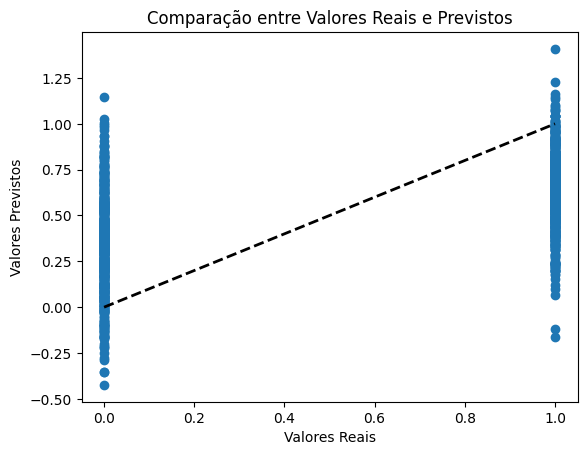

In [ ]:
import matplotlib.pyplot as plt

# Supondo que você tenha:
# y_test: valores reais
# y_pred: valores previstos pelo modelo

# Fazer previsões
y_pred = grid_search_linear.predict(X_test)

# Criando o gráfico de dispersão
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação entre Valores Reais e Previstos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Linha de referência
plt.show()

## Melhores parametros do SVM com Grid_search

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Definindo os valores dos hiperparâmetros a serem testados
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'gamma': [0.01, 0.1, 1]}

In [ ]:
# Criando o modelo SVM
svm = SVC()

In [ ]:
# Criando o objeto GridSearchCV
grid = GridSearchCV(svm, param_grid, cv=5)

In [ ]:
# Executando o Grid Search
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
# Obtendo os melhores parâmetros
# Melhores parâmetros: {'C': 1, 'gamma': 0.01, 'kernel': 'linear'} - com id
# Melhores parâmetros: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} - sem id
print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
# Avaliando o modelo com os melhores parâmetros no conjunto de teste
# Acurácia: 0.7464285714285714 - com id
# Acurácia: 0.9071428571428571 - sem id
print("Acurácia:", grid.best_score_)

Acurácia: 0.9071428571428571


## Melhores parametros do Naive bayes com Grid_search

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Criar o modelo de Naive Bayes
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = gnb.predict(X_test)

In [ ]:
# Avaliar o modelo
# Acurácia: 0.75
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred))

Acurácia: 0.75
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       593
           1       0.76      0.73      0.75       607

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200



## Melhores parametros da arvore de decisão com grid_search

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
# Assumindo que você já tem seus dados em um DataFrame chamado 'data'

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
#{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
#Acuracia: 81%
best_params = grid_search.best_params_
print(best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy: 0.81875


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(best_model, filled=True)
plt.show()

## Melhores parametros do random forest com grid_search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Definindo os hiperparâmetros a serem ajustados
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
# Criando o modelo e realizando o Grid Search
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
#{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100} - com id
#{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300} - sem id
# Melhor modelo e seus parâmetros
best_params = grid_search.best_params_
print(best_params)


{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [ ]:
#acuracia: 90,5% - com id
#acuracia: 90,875% - sem id
# Avaliando o melhor modelo no conjunto de teste
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.91


In [ ]:
from sklearn.metrics import classification_report

# Assumindo que você tem as verdadeiras classes (y_true) e as previsões do seu modelo (y_pred)

print(classification_report(y_test, y_pred))

## Melhores parametros do regressão logistica com grid_search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Criando um dicionário com os hiperparâmetros a serem testados
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Criando o modelo de regressão logística
logreg = LogisticRegression()

# Criando o objeto GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Ajustando o GridSearch aos dados de treinamento
grid_search.fit(X_train, y_train)

# Imprimindo os melhores parâmetros
print(grid_search.best_params_)

# Avaliando o modelo com os melhores parâmetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# Avaliar o modelo usando métricas como acurácia, precisão, recall, F1-score

{'C': 10, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.75375


# Visão das metricas

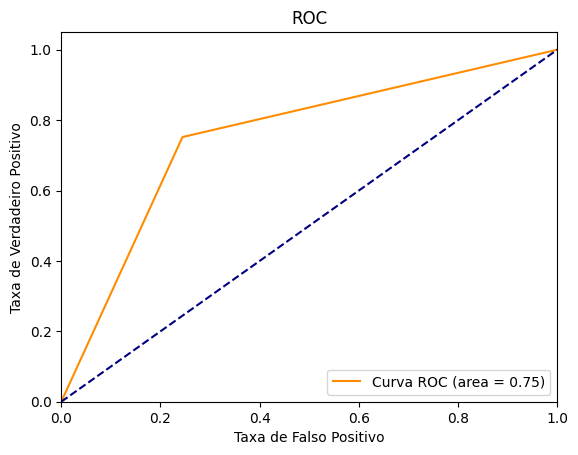

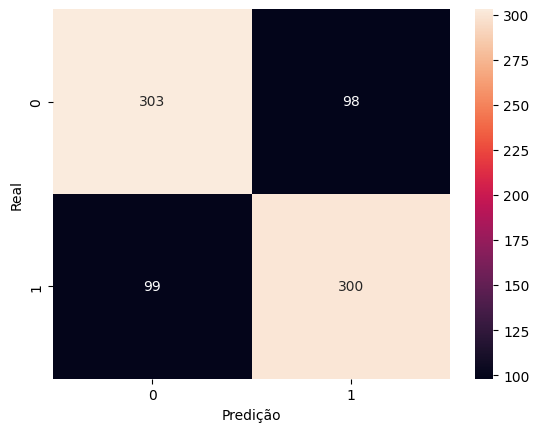

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       401
           1       0.75      0.75      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



In [ ]:
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.plot(fpr, tpr, color='darkorange', label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

# Criando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizando a matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

# Imprimindo o relatório de classificação
print(classification_report(y_test, y_pred))

# Area do quireza

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV